# scCODEX - Cell Segmentation

## Set up envrionment

In [10]:
#import standard packages
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import skimage

import warnings
warnings.filterwarnings('ignore')

data_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/' # where the data is stored
code_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/pipeline_test_112023/src' # current where the code is stored, this will be replaced by pip install soon
output_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/demo_data/output_112023/' #where you want to store the output
out_fname = "tonsil"

if not os.path.exists(output_dir): # check if output path exist - if not generate the path
    os.makedirs(output_dir)
    
sys.path.append(code_dir) # This code is only needed if you want to load functions from a non-default directory

from segmentation import * # Functions for cell segmentation

## 1.1 GPU envrionment

In [11]:
#check if GPU availability
!nvcc --version
!nvidia-smi

zsh:1: command not found: nvcc
zsh:1: command not found: nvidia-smi


In [12]:
use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

>>> GPU activated? NO


## 1.2 Cell segmentation

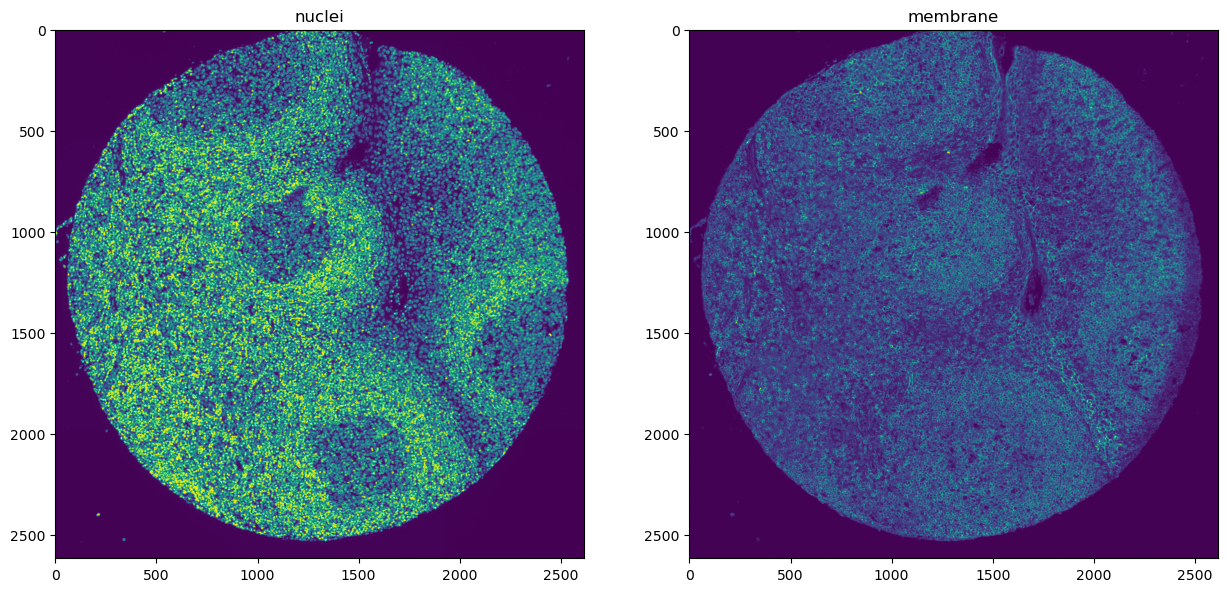

In [13]:
# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 
pl_membrane_ch(file_name = data_dir + 'tonsil/1/reg010_X01_Y01_Z01.tif', # image for segmentation
                   channel_file = data_dir + 'tonsil/channelnames.txt', # all channels used for staining
                   output_dir = output_dir, #
                   membrane_channel_list = ["CD4", "CD3", "CD20", "CD45", "Podoplanin", "betaCatenin"], # channels used for membrane segmentation
                   nuclei_channel = 'DAPI',
                   technology = 'Phenocycler')

Create image channels!
Segmenting with Mesmer!
1/1 [==============================] - 0s 477ms/step


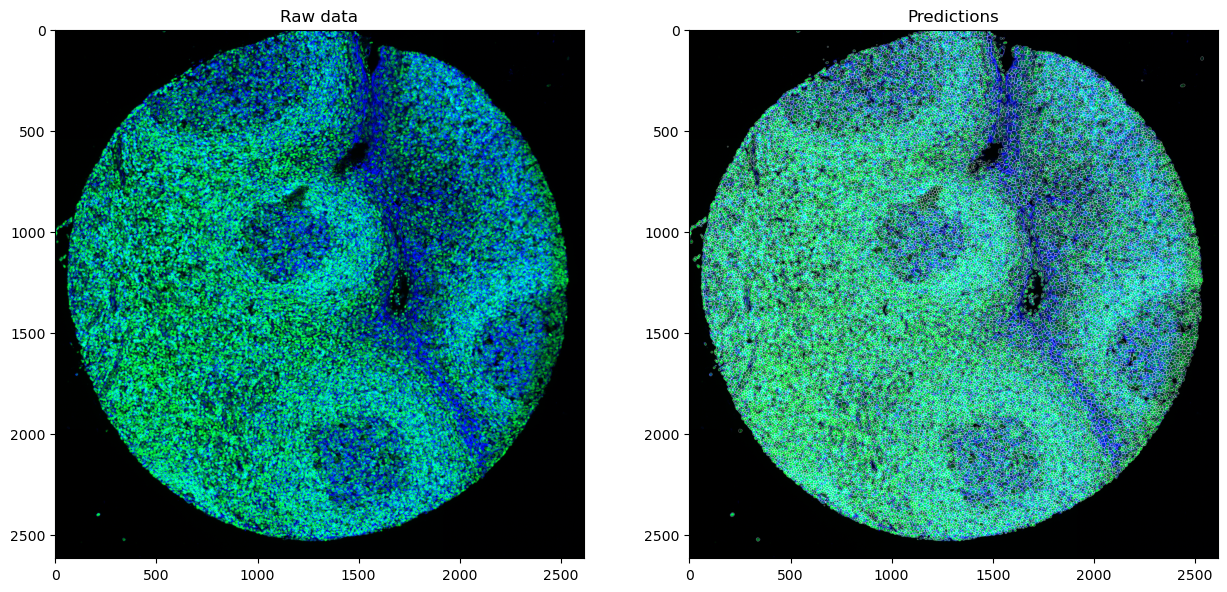

Quantifying features after segmentation!


Processing channels: 100%|████████████████████████████████████████████████████████████████| 59/59 [00:04<00:00, 13.67it/s]


Done!


In [16]:
# choose between cellpose or mesmer for segmentation
# first image
img_1, image_dict_1, masks_1 = tl_cell_segmentation(file_name = data_dir + 'tonsil/1/reg010_X01_Y01_Z01.tif',
                    channel_file = data_dir + 'tonsil/channelnames.txt',
                    output_dir = output_dir,
                    output_fname = 'tonsil1',
                    seg_method ='mesmer', # cellpose or mesmer
                    nuclei_channel = 'DAPI',
                    technology ='Phenocycler', # Phenocycler or codex
                    membrane_channel_list = ["CD45", "betaCatenin"], #default is None ["CD4", "CD3", "CD20", "CD45", "Podoplanin", "betaCatenin"]
                    size_cutoff = 0)

In [18]:
# second image
img_2, image_dict_2, masks_2 = tl_cell_segmentation(file_name = data_dir + 'tonsil/2/reg001_X01_Y01_Z01.tif',
                    channel_file = data_dir + 'tonsil/channelnames.txt',
                    output_dir = output_dir,
                    output_fname = 'tonsil2_nuclei',
                    seg_method ='cellpose', # cellpose or mesmer
                    nuclei_channel = 'DAPI',
                    technology ='Phenocycler', # Phenocycler or codex
                    membrane_channel_list = ["CD45", "betaCatenin"], #default is None
                    size_cutoff = 0)

Create image channels!


Segmenting with Cellpose!
Selecting nucleus and membrane channel for segmentation.
Quantifying features after segmentation!


Processing channels: 100%|████████████████████████████████████████████████████████████████| 59/59 [00:05<00:00, 10.24it/s]


Done!


## 1.3 Viusalizing segmentation result